In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
## to avoid warnings
import warnings

In [3]:
#import csv file
data2=pd.read_csv("SolarPowerPlantData.csv")

In [4]:
data2

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0
...,...,...,...,...,...,...,...,...
8755,31.12.2017-19:00,4.1,0,988.2,-4.8,-0.7,94,0.0
8756,31.12.2017-20:00,2.1,0,987.3,-5.0,-0.3,95,0.0
8757,31.12.2017-21:00,1.8,0,986.7,-5.3,0.2,93,0.0
8758,31.12.2017-22:00,2.2,0,986.0,-5.4,0.3,92,0.0


In [5]:
#check null cells
data2.isna().head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [6]:
len(data2)

8760

In [7]:
## total None values
nulcount=data2.isnull().sum().sum()
nulcount

np.int64(0)

In [8]:
nulcount=data2.isnull().sum()
nulcount

Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

In [9]:
len(data2)

8760

In [10]:
data2["Date-Hour(NMT)"] = data2["Date-Hour(NMT)"].astype("str")
data2["Date-Hour(NMT)"] = data2["Date-Hour(NMT)"].apply(lambda x: int(x.split('.')[1])).astype("int8")

In [11]:
data2

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,1,0.6,0,1003.8,-7.4,0.1,97,0.0
1,1,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,1,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,1,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,1,4.0,0,1003.1,-6.3,3.6,67,0.0
...,...,...,...,...,...,...,...,...
8755,12,4.1,0,988.2,-4.8,-0.7,94,0.0
8756,12,2.1,0,987.3,-5.0,-0.3,95,0.0
8757,12,1.8,0,986.7,-5.3,0.2,93,0.0
8758,12,2.2,0,986.0,-5.4,0.3,92,0.0


In [12]:
data2 = data2.astype(float)

<Axes: >

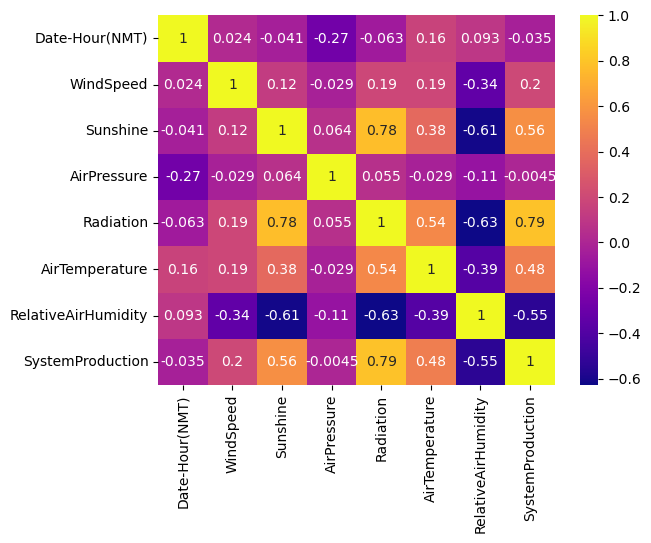

In [13]:
sns.heatmap(data2.corr(),annot=True,cmap="plasma")

In [14]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [15]:
data2['WindSpeed']=scale.fit_transform(data2[['WindSpeed']])
data2['Sunshine']=scale.fit_transform(data2[['Sunshine']])
data2['AirPressure']=scale.fit_transform(data2[['AirPressure']])
data2['Radiation']=scale.fit_transform(data2[['Radiation']])
data2['AirTemperature']=scale.fit_transform(data2[['AirTemperature']])
data2['RelativeAirHumidity']=scale.fit_transform(data2[['RelativeAirHumidity']])
data2['SystemProduction']=scale.fit_transform(data2[['SystemProduction']])

In [16]:
data2

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,1.0,-1.252454,-0.528126,-0.512910,-0.575555,-0.904661,1.052013,-0.460374
1,1.0,-0.577053,-0.528126,-0.536360,-0.575555,-0.944115,1.103886,-0.460374
2,1.0,-1.252454,-0.528126,-0.544176,-0.571716,-1.075628,1.155759,-0.460374
3,1.0,-0.147252,-0.528126,-0.551993,-0.574458,-1.088779,1.155759,-0.460374
4,1.0,0.835150,-0.528126,-0.567626,-0.569522,-0.444367,-0.504174,-0.460374
...,...,...,...,...,...,...,...,...
8755,12.0,0.896551,-0.528126,-1.732304,-0.561295,-1.009871,0.896394,-0.460374
8756,12.0,-0.331452,-0.528126,-1.802653,-0.562392,-0.957266,0.948267,-0.460374
8757,12.0,-0.515652,-0.528126,-1.849553,-0.564038,-0.891510,0.844521,-0.460374
8758,12.0,-0.270052,-0.528126,-1.904270,-0.564586,-0.878359,0.792648,-0.460374


In [17]:
Features=data2.drop(["SystemProduction"],axis=1)
Features.describe()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity
count,8760.000000,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03
mean,6.526027,-1.232905e-16,3.244487e-18,8.046329e-15,3.244487e-17,3.893385e-17,-2.271141e-16
std,3.448048,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00
min,1.000000,-1.620855e+00,-5.281263e-01,-3.475412e+00,-5.859763e-01,-2.548569e+00,-3.305309e+00
25%,4.000000,-7.612530e-01,-5.281263e-01,-5.910762e-01,-5.689738e-01,-8.520563e-01,-6.597923e-01
50%,7.000000,-2.086518e-01,-5.281263e-01,4.988722e-02,-5.426472e-01,-7.613171e-02,2.739196e-01
75%,10.000000,5.895499e-01,-1.974711e-01,6.126844e-01,9.906181e-02,8.444568e-01,8.445213e-01
max,12.000000,5.071760e+00,2.306061e+00,2.887323e+00,4.399609e+00,2.646180e+00,1.207631e+00


In [18]:
target=pd.DataFrame()
target['SystemProduction']=data2['SystemProduction']
target.describe()

,SystemProduction
count,8.760000e+03
mean,-2.595590e-17
std,1.000057e+00
min,-4.603738e-01
25%,-4.603738e-01
50%,-4.603738e-01
75%,-1.482457e-01
max,4.717222e+00


In [19]:
## create train and test data
Features_train,Features_test,Target_train,Target_test=train_test_split(Features,target,test_size=0.05)

In [20]:
py=pd.DataFrame()

In [21]:
#creat model and fit
model2=LinearRegression()
warnings.filterwarnings('ignore')
model2.fit(Features_train,Target_train)

LinearRegression()

In [22]:
py["SystemProduction"]=model2.predict(Features_test).flatten()
py.head()

,SystemProduction
0,-0.361729
1,-0.384322
2,-0.235209
3,1.239357
4,-0.309259


## model score

In [23]:
print("model R2 Score: ",model2.score(Features_test,Target_test))

model R2 Score:  0.65481141633362


In [24]:
def plot_model_predictions(ytrain, ytrp, ytest, ytep, model_name="Model"):
    fig, axes = plt.subplots(11, 1, figsize=(16, 55))  # 11 vertical subplots

    sns.lineplot(x=range(2000), y=ytrain[:2000], color='blue', alpha=0.5, ax=axes[0])
    sns.lineplot(x=range(2000), y=ytrp[:2000], color='green', alpha=0.5, ax=axes[0])
    axes[0].set_title(f"{model_name} - Full Train vs Predicted")
    
    sns.lineplot(x=range(200), y=ytrain[:200], color='blue', ax=axes[1])
    sns.lineplot(x=range(200), y=ytrp[:200], color='green', alpha=0.7, ax=axes[1])
    axes[1].set_title(f"{model_name} - First 200 Train vs Predicted")
    
    sns.lineplot(x=range(200), y=ytrain[:200], color='blue', ax=axes[2])
    axes[2].set_title(f"{model_name} - First 200 Train Only")
    
    sns.lineplot(x=range(200), y=ytrp[:200], color='green', ax=axes[3])
    axes[3].set_title(f"{model_name} - First 200 Predicted Train Only")
    
    sns.lineplot(x=ytrain[:20000], y=ytrp[:20000], color='orange', ax=axes[4])
    axes[4].set_title(f"{model_name} - Train vs Predicted Scatter")
    
    sns.lineplot(x=ytrain[:200], y=ytrp[:200], color='orange', ax=axes[5])
    axes[5].set_title(f"{model_name} - First 200 Train vs Predicted Scatter")
    
    sns.lineplot(x=range(200), y=ytest[:200], color='blue', ax=axes[6])
    sns.lineplot(x=range(200), y=ytep[:200], color='green', alpha=0.7, ax=axes[6])
    axes[6].set_title(f"{model_name} - First 200 Test vs Predicted")
    
    sns.lineplot(x=range(200), y=ytest[:200], color='blue', ax=axes[7])
    axes[7].set_title(f"{model_name} - First 200 Test Only")
    
    sns.lineplot(x=range(200), y=ytep[:200], color='green', ax=axes[8])
    axes[8].set_title(f"{model_name} - First 200 Predicted Test Only")
    
    sns.lineplot(x=ytest, y=ytep, color='orange', ax=axes[9])
    axes[9].set_title(f"{model_name} - Test vs Predicted Scatter")

    sns.lineplot(x=ytest[:200], y=ytep[:200], color='orange', ax=axes[10])
    axes[10].set_title(f"{model_name} - First 200 Test vs Predicted Scatter")
    
    plt.tight_layout()
    plt.show()


In [25]:
lr = LinearRegression()
lr.fit(Features,target)

ypred_train=pd.DataFrame()
ypred_test=pd.DataFrame()

ypred_train['p'] = lr.predict(Features_train).flatten()
ypred_test['p'] = lr.predict(Features_test).flatten()
try:    
    print("Linear Regression:")
    print("model score :",lr.score(Features_test,Target_test))
except Exception :
    pass   

Linear Regression:
model score : 0.6554266816788474


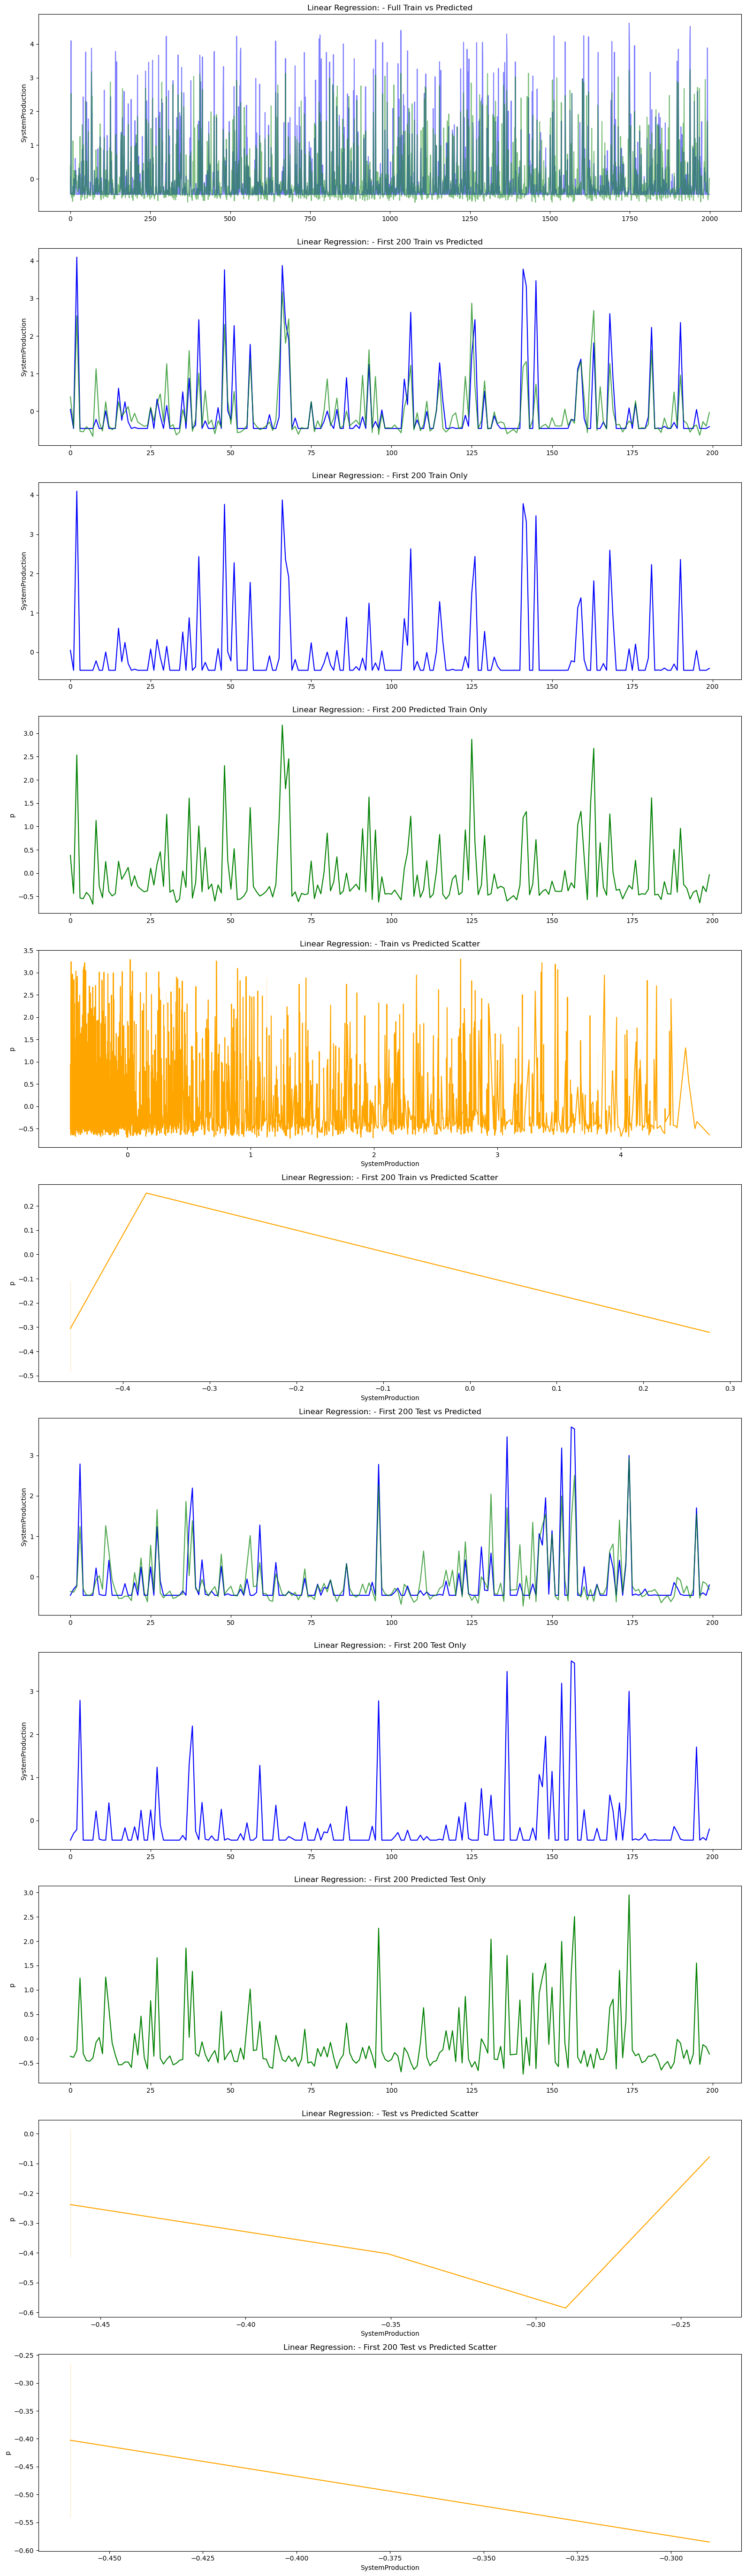

CPU times: total: 6.97 s
Wall time: 5.78 s


In [26]:
%%time
plot_model_predictions(
    Target_train.SystemProduction,
    ypred_train.p,
    Target_test.SystemProduction,
    ypred_test.p,
    model_name="Linear Regression:"
)

In [27]:
import joblib
joblib.dump(model2, "system_production_model.pkl")
print("Model saved as 'system_production_model.pkl'")

Model saved as 'system_production_model.pkl'


# you should run only this 

In [ ]:
# run this only one time
!pip install numpy joblib scikit-learn

In [40]:
def predict_system_production(model_path="system_production_model.pkl"):
    import joblib
    import numpy as np
    model = joblib.load(model_path)

    print("Enter the following values for prediction:")

    date_hour = float(input("Date-Hour (NMT) [for reference only]: "))
    wind_speed = float(input("Wind Speed (m/s): "))
    sunshine = float(input("Sunshine (hours): "))
    air_pressure = float(input("Air Pressure (hPa): "))
    radiation = float(input("Radiation (W/m²): "))
    air_temperature = float(input("Air Temperature (°C): "))
    relative_humidity = float(input("Relative Air Humidity (%): "))

    features = np.array([[date_hour,wind_speed, sunshine, air_pressure, radiation, air_temperature, relative_humidity]])

    # Make prediction
    prediction = model.predict(features).item()

    print(f"\nPredicted System Production for {date_hour}: {prediction}")
    return prediction

In [41]:
ans=predict_system_production("system_production_model.pkl")

Enter the following values for prediction:


Date-Hour (NMT) [for reference only]:  5
Wind Speed (m/s):  5
Sunshine (hours):  5
Air Pressure (hPa):  5
Radiation (W/m²):  5
Air Temperature (°C):  5
Relative Air Humidity (%):  5



Predicted System Production for 5.0: 2.796143017738269


In [42]:
ans

2.796143017738269